<a href="https://colab.research.google.com/github/hsuemily/CE888_Hsu-Chi-Rou_1900759/blob/master/Assignment/Dataset3_SafeDriver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Library

In [1]:
# Import library
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2.  Load Dataset

In [2]:
# Load data
# Colab library to upload files to notebook, Ref:https://medium.com/@saedhussain/google-colaboratory-and-kaggle-datasets-b57a83eb6ef8
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

# Load data from Kaggle to Google Colab virtual machine
os.environ['KAGGLE_USERNAME'] = "emilyhsucr" # username from the json file
os.environ['KAGGLE_KEY'] = "3b6aa5aa02b468c89e4cfac52a5d992e" # key from the json file
!kaggle competitions download -c porto-seguro-safe-driver-prediction # api copied from kaggle

  0% 0.00/2.12M [00:00<?, ?B/s]
100% 2.12M/2.12M [00:00<00:00, 70.5MB/s]
 56% 25.0M/44.4M [00:01<00:01, 13.4MB/s]
100% 44.4M/44.4M [00:01<00:00, 31.7MB/s]
 57% 17.0M/30.0M [00:01<00:00, 15.0MB/s]
100% 30.0M/30.0M [00:01<00:00, 25.8MB/s]


In [0]:
## Porto Seguro’s Safe Driver Prediction 
SafeDriver = pd.read_csv('train.csv.zip')


In [4]:
SafeDriver.head(5)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [5]:
SafeDriver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

## 3. Data Visualization

Class <=50K: 573518
Class >50K: 21694
Imbalance rate: 96.36 %


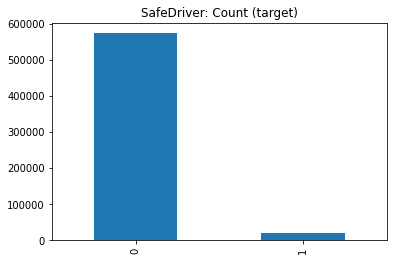

In [6]:
# Plot histogram of the label target in Safe Driver dataset
pd.Series(SafeDriver['target']).value_counts().plot(kind='bar',title='SafeDriver: Count (target)')
target_count = SafeDriver.target.value_counts()
print('Class <=50K:', target_count[0])
print('Class >50K:', target_count[1])
print('Imbalance rate:', round((target_count[0] / (target_count[0]+target_count[1]))*100, 2), '%')

## 4. Data Preprocessing
 - 4.1 Missing Value
 - 4.2 Normalization

### 4.1 Missing Value

In [10]:
# dealing with missing value

#*****SafeDriver
total = SafeDriver.isnull().sum().sort_values(ascending=False)
# summarize the amount of missing value in each attributes, and then sort it by descending order
# percent = the counts of missing value /the counts of item (in each attribute)
percent = (SafeDriver.isnull().sum()/SafeDriver.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head()

,Total,Percent
ps_calc_20_bin,0,0.0
ps_ind_13_bin,0,0.0
ps_car_04_cat,0,0.0
ps_car_03_cat,0,0.0
ps_car_02_cat,0,0.0


### 4.2 Normalization

In [11]:
# Normalize dataset - SafeDriver
SafeDriver_copy = SafeDriver.copy()
for col in SafeDriver_copy.select_dtypes(include='number').columns:
    mms = MinMaxScaler()
    SafeDriver_copy[col] = mms.fit_transform(SafeDriver_copy[[col]])
SafeDriver_copy.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.499857,0.036448,0.271483,0.471789,0.402120,0.708397,0.200741,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.003113,0.561532,0.660823,0.121081,0.153446,0.678879,0.243991,0.307884,0.774661,0.914966,0.247550,0.080577,0.421134,0.385608,0.955014,0.832080,0.465778,0.496068,0.594327,0.836518,0.609271,0.162145,0.779919,0.819396,0.499729,0.499544,0.499832,0.474416,0.314314,0.768945,0.333980,0.722590,0.334148,0.337344,0.286389,0.144192,0.220945,0.327784,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.288550,0.187401,0.283398,0.132919,0.245446,0.246656,0.192949,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.031886,0.272772,0.473430,0.326222,0.360417,0.319603,0.224591,0.157506,0.209023,0.187858,0.394327,0.239274,0.422209,0.323614,0.173553,0.373796,0.195749,0.045809,0.320509,0.208137,0.025752,0.064723,0.218256,0.195466,0.319109,0.318771,0.319059,0.223444,0.189155,0.133431,0.157174,0.145967,0.178136,0.116184,0.122783,0.120296,0.130376,0.119420,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249986,0.000000,0.000000,0.400000,0.181818,0.500000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.384615,0.000000,0.000000,0.000000,0.444444,0.111111,0.302703,0.666667,1.000000,0.000000,0.000000,0.000000,0.058824,1.000000,1.000000,0.200000,0.500000,0.300971,0.750000,0.581139,0.121109,0.814697,0.755929,0.222222,0.222222,0.222222,0.400000,0.166667,0.700000,0.222222,0.600000,0.142857,0.240000,0.210526,0.100000,0.153846,0.260870,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.499684,0.000000,0.142857,0.400000,0.363636,0.500000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.538462,1.000000,0.000000,0.000000,0.777778,0.166667,0.341543,0.666667,1.000000,0.000000,0.000000,0.500000,0.411765,1.000000,1.000000,0.600000,0.500000,0

## 5. Supervised Learning
### 5.1 Decesion tree (cross-validation)
### 5.2 Random forest (cross-validation)